In [1]:
import read
import matplotlib.pyplot as plt
from CentralStreamingModel.projection import generating_moments
from scipy.integrate import simps
import numpy as np
import moments2model
from scipy.interpolate import interp1d
from scipy.stats import norm
import seaborn as sns
import CentralStreamingModel.integral.real2redshift as integrate
sns.set_context('talk')
import importlib
from halotools.mock_observables import tpcf_multipole
from scipy.interpolate import RegularGridInterpolator
from CentralStreamingModel.skewt import skewt_moments

In [142]:
%%time 

n_boxes = 5
boxsize = 1024
snapshot = 0
tracer = 'halos'
rm = read.Read_Mean(n_boxes, boxsize, snapshot, tracer = tracer)

/cosma6/data/dp004/dc-cues1/pv_results/halos_b1.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b2.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b3.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b4.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b5.txt
CPU times: user 24.3 s, sys: 759 ms, total: 25.1 s
Wall time: 22.1 s


In [143]:
ex = generating_moments.Expectations(rm.r, rm.v_r, rm.v_t,
                                     rm.jointpdf_rt)

In [220]:
importlib.reload(moments2model)

<module 'moments2model' from '/cosma/home/dp004/dc-cues1/CentralStreamingModel/moments/moments2model.py'>

In [221]:
pearson = moments2model.Model(rm, ex, 'pearson')

Found params from moments
0
0


In [4]:
%%time

measured = moments2model.Model(rm, ex, 'measured')

CPU times: user 3.91 s, sys: 123 ms, total: 4.03 s
Wall time: 165 ms


In [5]:
%%time

st = moments2model.Model(rm, ex, 'st')

Found params from moments


/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


CPU times: user 31.7 s, sys: 1.11 s, total: 32.8 s
Wall time: 4.91 s


In [6]:
%%time

gaussian = moments2model.Model(rm, ex, 'gaussian')

CPU times: user 30.6 s, sys: 954 ms, total: 31.5 s
Wall time: 1.31 s


In [7]:
%%time

bf_gaussian = moments2model.Model(rm, ex, 'bf-gaussian')



Found optimal parameters
CPU times: user 24 s, sys: 383 ms, total: 24.3 s
Wall time: 15 s


In [87]:
%%time 

bf_st = moments2model.Model(rm, ex, 'bf-st')

KeyboardInterrupt: 

In [217]:
np.sum(np.isnan(pearson.params))

0

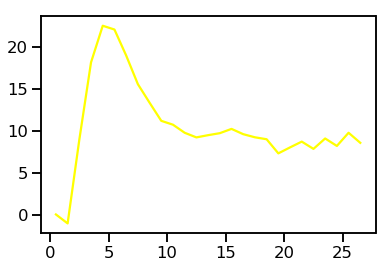

In [224]:

plt.plot(st.s_c, st.s_c * st.s_c * pearson.hexa,
         color = pearson.color, label='Pearson')

In [95]:

mean = simps(rm.v_los * rm.jointpdf_los, rm.v_los, axis = -1) 

std = np.sqrt(simps( (rm.v_los - mean[..., np.newaxis])**2 * rm.jointpdf_los, rm.v_los, axis = -1))

gamma1 = simps( (rm.v_los - mean[..., np.newaxis])**3 * rm.jointpdf_los, rm.v_los, axis = -1)/std**3

gamma2 = simps( (rm.v_los - mean[..., np.newaxis])**4 * rm.jointpdf_los, rm.v_los, axis = -1)/std**4 - 3.



In [97]:
from CentralStreamingModel.pearson import pearson_moments as pm
from CentralStreamingModel.pearson import pearson as ps

In [123]:
i = 0
j = 1

params = pm.moments2parameters(mean[i, j], std[i,j], gamma1[i,j], gamma2[i,j], p0 = (3.,3.0))

In [124]:
params

(-10.753521657290737,
 10.375077894596581,
 6.954794328181526,
 -7.908906715686532)

In [129]:
pearson.params[0,0]

array([-3.00529866e+01,  1.14661011e-03,  3.32475343e+01, -1.58095052e+06])

In [197]:
a = np.zeros((50,100, len(rm.v_los)))

for i in range(0, 1):
    for j in range(55,60):
        
        
        a[i, j] = ps.pearson(rm.v_los, *pearson.params[i,j])


In [211]:
auxparams = pearson.params[0, 59].copy()
auxparams[-1] = 500

In [212]:
ps.pearson(rm.v_los, *auxparams)

array([1.62015339e-13, 4.93428097e-13, 1.49192146e-12, 4.47552498e-12,
       1.33113758e-11, 3.92256529e-11, 1.14433777e-10, 3.30235403e-10,
       9.41901681e-10, 2.65280015e-09, 7.37056462e-09, 2.01812766e-08,
       5.43970020e-08, 1.44170730e-07, 3.75250183e-07, 9.57940799e-07,
       2.39511670e-06, 5.85656265e-06, 1.39831082e-05, 3.25448366e-05,
       7.37060915e-05, 1.62122187e-04, 3.45636796e-04, 7.12686333e-04,
       1.41800551e-03, 2.71576083e-03, 4.99344587e-03, 8.78998597e-03,
       1.47691562e-02, 2.36109851e-02, 3.57913875e-02, 5.12578686e-02,
       6.90812640e-02, 8.72484803e-02, 1.02802624e-01, 1.12463306e-01,
       1.13642108e-01, 1.05484634e-01, 8.94099550e-02, 6.87648662e-02])

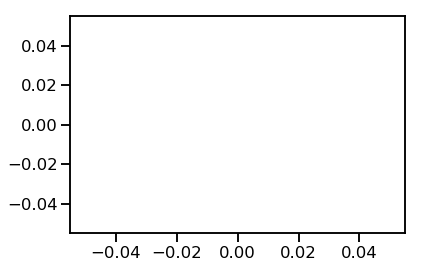

In [200]:
plt.plot(ps.pearson(rm.v_los, *pearson.params[0,59]))

In [199]:
np.where(np.isnan(a))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]))

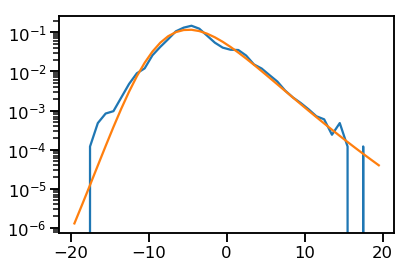

In [125]:
plt.semilogy(rm.v_los, rm.jointpdf_los[i,j])
plt.semilogy(rm.v_los, ps.pearson(rm.v_los, *params))

Text(0.5,0,'$s$ [Mpc/h]')

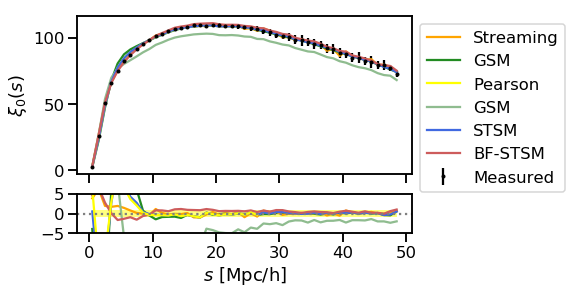

In [226]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.mono.mean,
            yerr =  rm.s_c * rm.s_c * rm.mono.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(measured.s_c, measured.s_c * measured.s_c * measured.mono,
         color = 'orange', label='Streaming')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.mono,
         color = gaussian.color, label='GSM')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * pearson.mono,
         color = pearson.color, label='Pearson')


ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * bf_gaussian.mono,
         color = bf_gaussian.color, label='GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.mono,
         color = st.color, label='STSM')

ax1.plot(st.s_c, st.s_c * st.s_c * bf_st.mono,
         color = bf_st.color, label='BF-STSM')


ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_0(s)$')


ax2.plot(gaussian.s_c, (gaussian.mono - rm.mono.mean)/rm.mono.std,
        color = gaussian.color )

ax2.plot(gaussian.s_c, (measured.mono - rm.mono.mean)/rm.mono.std,
        color = 'orange')

ax2.plot(gaussian.s_c, (bf_gaussian.mono - rm.mono.mean)/rm.mono.std,
        color = bf_gaussian.color )

ax2.plot(st.s_c, (st.mono - rm.mono.mean)/rm.mono.std,
        color = st.color )

ax2.plot(st.s_c, (bf_st.mono - rm.mono.mean)/rm.mono.std,
        color = bf_st.color )
ax2.plot(st.s_c, (pearson.mono - rm.mono.mean)/rm.mono.std,
        color = pearson.color )

ax2.axhline(y = 0., color='gray', linestyle='dotted')
ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)


ax2.set_xlabel(r'$s$ [Mpc/h]')

Text(0.5,0,'$s$ [Mpc/h]')

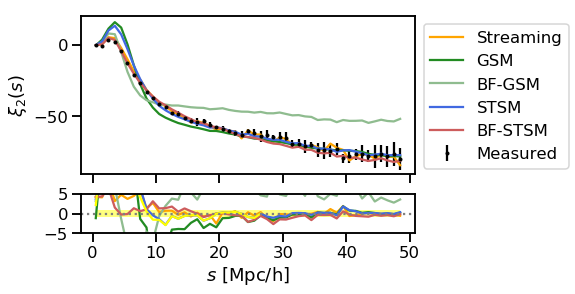

In [227]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.quad.mean,
            yerr =  rm.s_c * rm.s_c * rm.quad.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(measured.s_c, measured.s_c * measured.s_c * measured.quad,
         color = 'orange', label='Streaming')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.quad,
         color = gaussian.color, label='GSM')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * bf_gaussian.quad,
         color = bf_gaussian.color, label='BF-GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.quad,
         color = st.color, label='STSM')

ax1.plot(st.s_c, st.s_c * st.s_c * bf_st.quad,
         color = bf_st.color, label='BF-STSM')

ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_2(s)$')


ax2.plot(gaussian.s_c, (measured.quad - rm.quad.mean)/rm.quad.std,
        color = 'orange')

ax2.plot(gaussian.s_c, (gaussian.quad - rm.quad.mean)/rm.quad.std,
        color = gaussian.color )


ax2.plot(gaussian.s_c, (bf_gaussian.quad - rm.quad.mean)/rm.quad.std,
        color = bf_gaussian.color )

ax2.plot(st.s_c, (st.quad - rm.quad.mean)/rm.quad.std,
        color = st.color )
ax2.plot(st.s_c, (bf_st.quad - rm.quad.mean)/rm.quad.std,
        color = bf_st.color )
ax2.plot(st.s_c, (pearson.quad - rm.quad.mean)/rm.quad.std,
        color = pearson.color )


ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.axhline(y = 0., color='gray', linestyle='dotted')

ax2.set_ylim(-5.,5)
ax1.set_ylim(-90,20)


ax2.set_xlabel(r'$s$ [Mpc/h]')

Text(0.5,0,'$s$ [Mpc/h]')

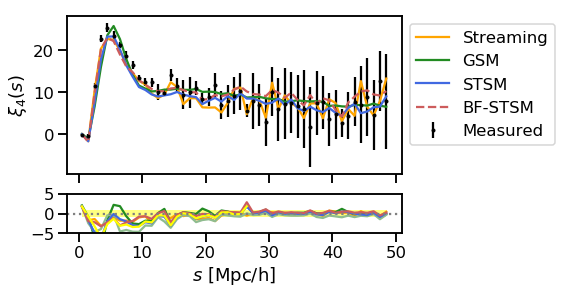

In [228]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.hexa.mean,
            yerr =  rm.s_c * rm.s_c * rm.hexa.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)
ax1.plot(measured.s_c, measured.s_c * measured.s_c * measured.hexa,
         color = 'orange', label='Streaming')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.hexa,
         color = gaussian.color, label='GSM')


#ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * bf_gaussian.hexa,
#         color = bf_gaussian.color, label='BF-GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.hexa,
         color = st.color, label='STSM')


ax1.plot(st.s_c, st.s_c * st.s_c * bf_st.hexa,
         color = bf_st.color, label='BF-STSM', linestyle='dashed')


ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_4(s)$')


ax2.plot(gaussian.s_c, (measured.hexa - rm.hexa.mean)/rm.hexa.std,
        color = 'orange')
ax2.plot(gaussian.s_c, (gaussian.hexa - rm.hexa.mean)/rm.hexa.std,
        color = gaussian.color )

ax2.plot(gaussian.s_c, (bf_gaussian.hexa - rm.hexa.mean)/rm.hexa.std,
        color = bf_gaussian.color )

ax2.plot(st.s_c, (st.hexa - rm.hexa.mean)/rm.hexa.std,
        color = st.color )
ax2.plot(st.s_c, (bf_st.hexa - rm.hexa.mean)/rm.hexa.std,
        color = bf_st.color )
ax2.plot(st.s_c, (pearson.hexa - rm.hexa.mean)/rm.hexa.std,
        color = pearson.color )



ax2.axhline(y = 0., color='gray', linestyle='dotted')



ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)


ax2.set_xlabel(r'$s$ [Mpc/h]')

TypeError: 'function' object is not subscriptable

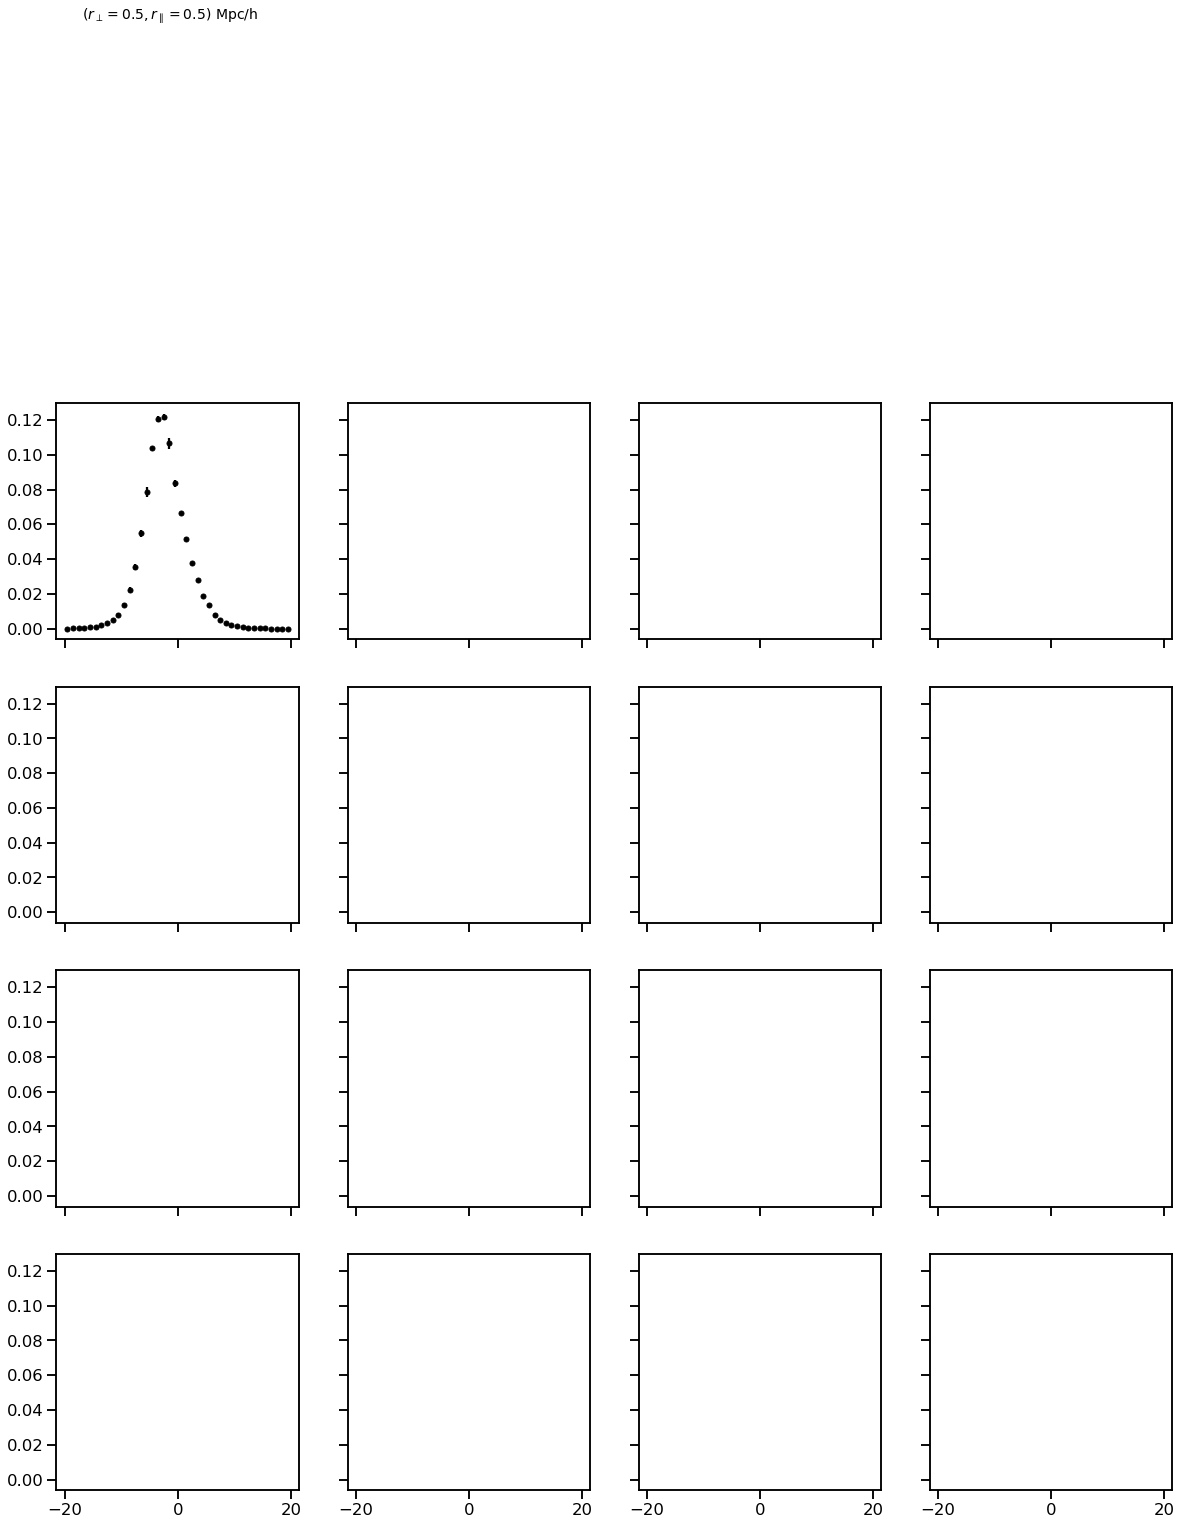

In [86]:
rlist1 = [0,5,10,40]
rlist2 = [0,5,10,40]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=True, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].text(-17,3.5e-1,r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(gaussian.rm.r_perp[rperp],
                                                       gaussian.rm.r_parallel[rparal]),fontsize=14)
        axes[i,j].errorbar(gaussian.rm.v_los, gaussian.rm.jointpdf_los[rperp,rparal], 
                yerr = gaussian.rm.jointpdf_los_error[rperp,rparal],
                linestyle='', marker='o',
                markersize = 5, color='k', label='Measured')
        
        axes[i,j].plot(gaussian.rm.v_los, gaussian.jointpdf_los[rperp,rparal], 
                linestyle='-',color=gaussian.color, label='Gaussian', linewidth=3)
        
        axes[i,j].plot(gaussian.rm.v_los, bf_gaussian.jointpdf_los[rperp,rparal], 
                linestyle='-',color=bf_gaussian.color, label='Gaussian - BF', linewidth=3)
        axes[i,j].plot(gaussian.rm.v_los, st.jointpdf_los[rperp,rparal], 
                linestyle='-',color=st.color, label='STSM', linewidth=3)
        axes[i,j].plot(gaussian.rm.v_los, bf_st.jointpdf_los[rperp,rparal], 
                linestyle='-',color=bf_st.color, label='STSM - BF', linewidth=3)


        axes[i,j].set_yscale("log", nonposy='clip')

        axes[i,j].set_ylim(1e-6,0.99)
        if j == 0:
            axes[i,j].set_ylabel(r'$\mathcal{P}(v_\parallel | r_\perp, r_\parallel)$ [Mpc/h]$^{-1}$')
            labels = list(axes[i,j].get_yticklabels())
            labels[-1] = ''
            axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$v_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()